## Design an experiment to compare the performance of AdaBoost and XGBoost algorithms on a binary classification task using a dataset of your choice. Write Python code to implement both algorithms and evaluate their performance using appropriate evaluation metrics.

In [13]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [14]:
data = load_breast_cancer()

X = data.data
y = data.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
def analyze_gb_model(model_name: str):
    model = None

    if model_name == "xgb":
        model = XGBClassifier() 
    elif model_name == "ada":
        model = AdaBoostClassifier() 
    else:
        return

    model.fit(X_train, y_train) 

    y_pred = model.predict(X_test) 
    y_probs = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test) 
    f1 = f1_score(y_pred, y_test)

    cm = confusion_matrix(y_pred, y_test) 
    auc_score = roc_auc_score(y_test, y_probs)

    conf = ConfusionMatrixDisplay(cm, display_labels=data.target_names) 
    conf.plot(cmap=plt.cm.Blues) 
    plt.title(f"Breast Tumor Classification - Benign (positive) vs Malignant (negative) [{model_name.upper()}]")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_probs)

    plt.figure(figsize=(8, 6))
    plt.title(f"ROC-AUC Curve for {model_name.upper()}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot([0, 1], [0, 1], color="black", linestyle="--")
    plt.plot(fpr, tpr, color="red", linestyle="-")
    plt.grid()
    plt.show()

    print(f"{model_name.upper()} metrics:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}\nAUC: {auc_score}")

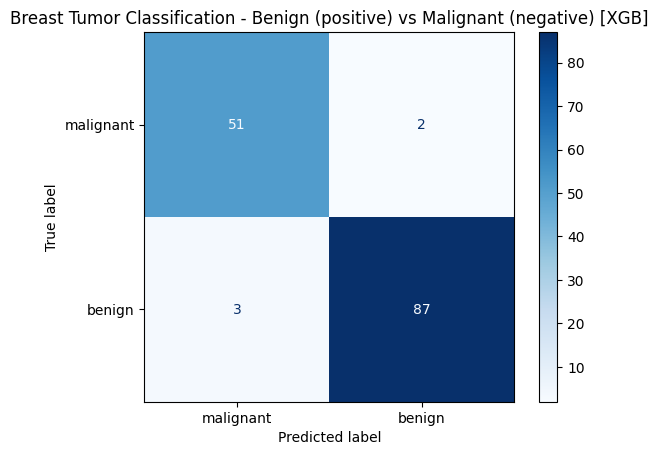

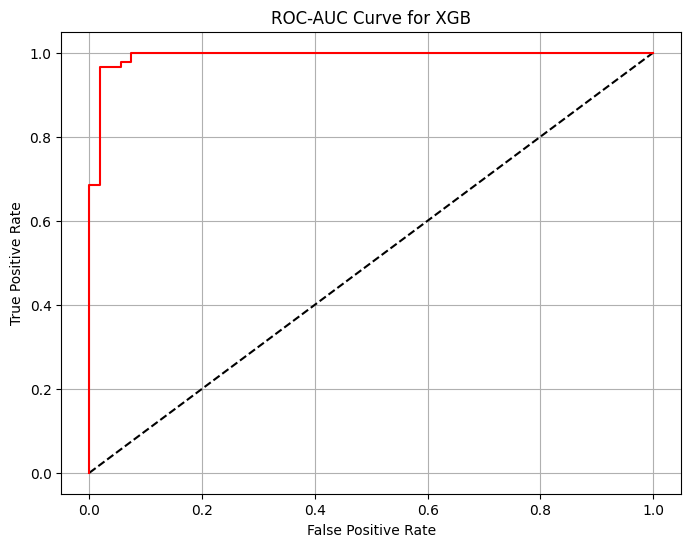

XGB metrics:
Accuracy: 0.965034965034965
Precision: 0.9775280898876404
Recall: 0.9666666666666667
F1: 0.9720670391061452
AUC: 0.9925093632958801


In [50]:
analyze_gb_model("xgb")

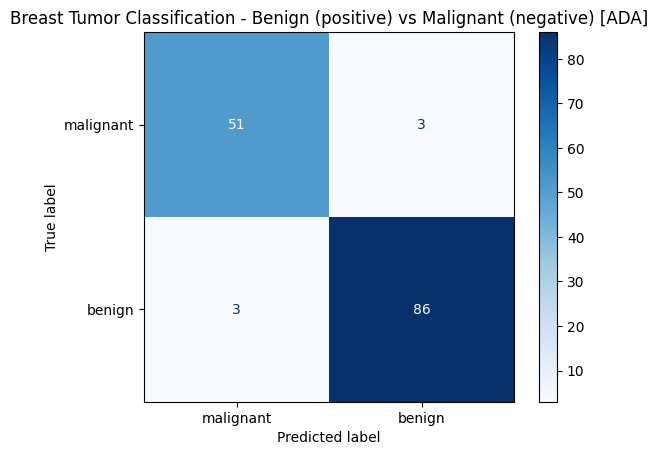

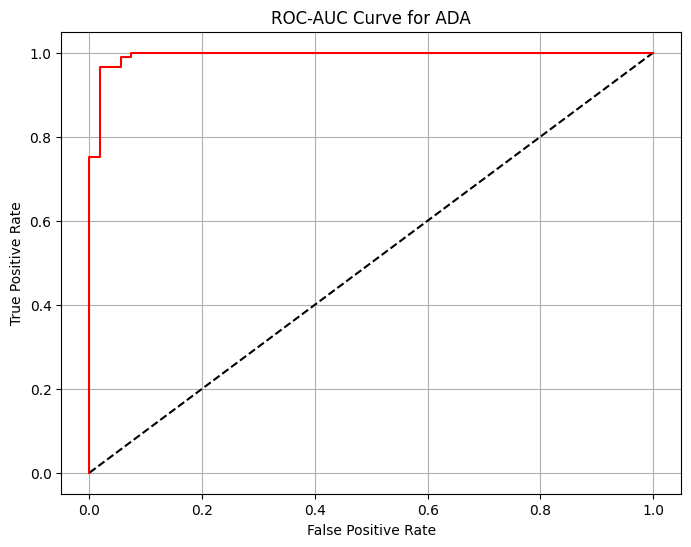

ADA metrics:
Accuracy: 0.958041958041958
Precision: 0.9662921348314607
Recall: 0.9662921348314607
F1: 0.9662921348314607
AUC: 0.9939658759883478


In [51]:
analyze_gb_model("ada")